# Case


*   Objective Statement
1. Mendapatkan wawasan bisnis tentang berapa banyak produk yang terjual setiap bulannya.
2. Mendapatkan wawasan bisnis tentang berapa banyak pelanggan membelanjakan uangnya setiap bulan.
3. Untuk mengurangi risiko dalam menentukan di mana, kapan, bagaimana, dan kepada siapa suatu produk, jasa, atau merek akan dipasarkan.
4. Meningkatkan efisiensi pemasaran dengan mengarahkan upaya khusus pada segmen tertentu dengan cara yang sesuai dengan karakteristik segmen tersebut
*   Challenges
1. Data berukuran besar, tidak dapat dikelola oleh spreadsheet excel.
2. Perlu beberapa koordinasi dari masing-masing departemen.
3. Data demografi banyak yang hilang dan salah ketik.

*   Metodologi
1. Analisis Deskriptif
2. Analisis Grafik
3. Analisis Segmentasi

*   Keuntungan Bisnis
1. Membantu Tim Pengembangan Bisnis untuk menciptakan diferensiasi produk berdasarkan karakteristik masing-masing pelanggan.
2. Mengetahui cara memperlakukan pelanggan dengan kriteria tertentu.


*  Hasil yang diharapkan
1. Mengetahui berapa banyak produk yang terjual setiap bulannya.
2. Mengetahui berapa banyak pelanggan menghabiskan uang mereka setiap bulan.
Analisis segmentasi pelanggan.
3. Rekomendasi berdasarkan segmentasi pelanggan.




# Business Understanding

* Ritel adalah proses penjualan barang atau jasa konsumen kepada pelanggan melalui berbagai saluran distribusi untuk mendapatkan keuntungan
* Kasus ini memiliki beberapa pertanyaan bisnis yang menggunakan data:
* Berapa banyak produk yang terjual setiap bulannya?
* Berapa banyak pelanggan yang membelanjakan uangnya setiap bulan?
* Bagaimana dengan analisis segmentasi pelanggan?
* Bagaimana dengan rekomendasi berdasarkan segmentasi pelanggan?

# Data Understanding

* Data of Retail Transaction from 01 December 2010 to 09 December 2011
* Source Data: Online retail dataset by UCI Machine Learning Library. https://archive.ics.uci.edu/ml/datasets/Online+Retail
* Data Dictionary:
1. InvoiceNo: Invoice number uniquely assigned to each transaction.
2. StockCode: Product (item) code.
3. Description: Product (item) name.
4. Quantity: The quantities of each product (item) per transaction.
5. InvoiceDate: The day and time when each transaction was generated.
6. UnitPrice: Product price per unit in sterling.
7. CustomerID: Customer number uniquely assigned to each customer.
8. Country: The name of the country where each customer resides.

# Data Preparation

* Kita menggunakan Python
* Menggunakan Packages : Pandas, Numpy, Matplotlib, Seaborn, Sklearn, and Feature Engine

1. Pandas: Digunakan untuk manipulasi dan analisis data dengan struktur data yang kuat seperti DataFrame dan Series.

2. NumPy: Menyediakan struktur data array multidimensi (ndarray) dan fungsi matematika untuk komputasi ilmiah.

3. Matplotlib: Pustaka visualisasi data yang memungkinkan pembuatan berbagai jenis plot dan grafik.

4. Seaborn: Dibangun di atas Matplotlib, menyediakan plot statistik yang lebih menarik dan mudah dibuat.

5. Scikit-learn: Menyediakan algoritma machine learning, preprocessing data, dan evaluasi model.

6. Feature Engine: Digunakan untuk pembersihan, pemrosesan, dan rekayasa fitur pada data sebelum membangun model machine learning.

In [1]:
# import packages
! pip install feature_engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 4.0 MB/s eta 0:00:00


In [11]:
#Importing Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
from datetime import datetime as dt2
from datetime import timedelta as td
from datetime import time as tm

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

import plotly.offline as pyoff
import plotly.graph_objs as go

import feature_engine
from feature_engine.outliers import Winsorizer

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import davies_bouldin_score

import warnings
warnings.filterwarnings("ignore")

In [14]:
#import dataset
import pandas as pd
file_path = "Online Retail.xlsx"
df = pd.read_excel(file_path)
df.head() # menampilkan 5 data teratas

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [15]:
# melihat informasi terkait tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [16]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


* Nilai minimum dan maksimum untuk Kuantitas adalah 80995, ini dapat mewakili pesanan yang dibatalkan atau dikembalikan.
* UnitPrice juga memiliki beberapa nilai negatif yang jarang terjadi, transaksi ini dapat mewakili pembatalan pesanan oleh pelanggan atau kredit macet yang ditimbulkan oleh bisnis.
* Penyesuaian piutang tak tertagih akan dikeluarkan dari kumpulan data karena tidak mewakili penjualan aktual.
* Kita perlu membersihkan nilai-nilai di atas dengan menghapusnya dari kumpulan data.

In [17]:
# melihat data unique
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [18]:
# melihat data yang memiliki nilai Null / kosong
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

* Hampir 25% ID Pelanggan hilang. Kami perlu menghapusnya karena tidak mungkin kami mendapatkan nomor ID Pelanggan.

In [19]:
#Country

df.Country.value_counts(normalize=True)

United Kingdom          0.914320
Germany                 0.017521
France                  0.015790
EIRE                    0.015124
Spain                   0.004674
Netherlands             0.004375
Belgium                 0.003818
Switzerland             0.003694
Portugal                0.002803
Australia               0.002323
Norway                  0.002004
Italy                   0.001482
Channel Islands         0.001399
Finland                 0.001283
Cyprus                  0.001148
Sweden                  0.000853
Unspecified             0.000823
Austria                 0.000740
Denmark                 0.000718
Japan                   0.000661
Poland                  0.000629
Israel                  0.000548
USA                     0.000537
Hong Kong               0.000531
Singapore               0.000423
Iceland                 0.000336
Canada                  0.000279
Greece                  0.000269
Malta                   0.000234
United Arab Emirates    0.000125
European C

* Kita dapat melihat bahwa terdapat proporsi maksimum (Lebih dari 90% pelanggan) pelanggan 'Inggris'. Jadi kami akan mengambil pelanggan 'Inggris' untuk analisis kami.

In [20]:
df = df[df.Country == 'United Kingdom']

* Menghapus nilai negatif dari Quantity dan UnitPrice

In [21]:
#Quantity

df = df[df.Quantity > 0]

In [22]:
#InvoiceDate

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceYearMonth'] = df['InvoiceDate'].map(lambda date: 100*date.year + date.month)
df['Date'] = df['InvoiceDate'].dt.strftime('%Y-%m')

In [23]:
#timebound

print(df["InvoiceDate"].min())
print(df["InvoiceDate"].max())
print("The data is from 1 year transaction")

2010-12-01 08:26:00
2011-12-09 12:49:00
The data is from 1 year transaction


In [24]:
#UnitPrice

df = df[df.UnitPrice > 0]

* Menghapus nilai Null dari data.

In [25]:
#CustomerID

df = df[pd.notnull(df['CustomerID'])]

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354321 entries, 0 to 541893
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         354321 non-null  object        
 1   StockCode         354321 non-null  object        
 2   Description       354321 non-null  object        
 3   Quantity          354321 non-null  int64         
 4   InvoiceDate       354321 non-null  datetime64[ns]
 5   UnitPrice         354321 non-null  float64       
 6   CustomerID        354321 non-null  float64       
 7   Country           354321 non-null  object        
 8   InvoiceYearMonth  354321 non-null  int64         
 9   Date              354321 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 29.7+ MB


* Terlihat data sudah siap diolah dan tidak memiliki missing value

## Exploratory Data Analysis

**How many product sold every month?**

In [27]:
#Aggregating the Orders by Month (mengelompokkan data berdasarkan date yang ada)

df_agg= df.groupby("Date").Quantity.sum()
df_agg.head()

Date
2010-12    267767
2011-01    278251
2011-02    213375
2011-03    276304
2011-04    260448
Name: Quantity, dtype: int64

In [28]:
#converting series to dataframe and resetting index (mengubah tiap series ke dataframe dan menghilangkan index yang ada)

df_agg=pd.DataFrame(df_agg)
df_agg=df_agg.reset_index()
df_agg.head()

,Date,Quantity
0,2010-12,267767
1,2011-01,278251
2,2011-02,213375
3,2011-03,276304
4,2011-04,260448


In [29]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Quantity', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='tab:Blue', marker='o')
    plt.show()

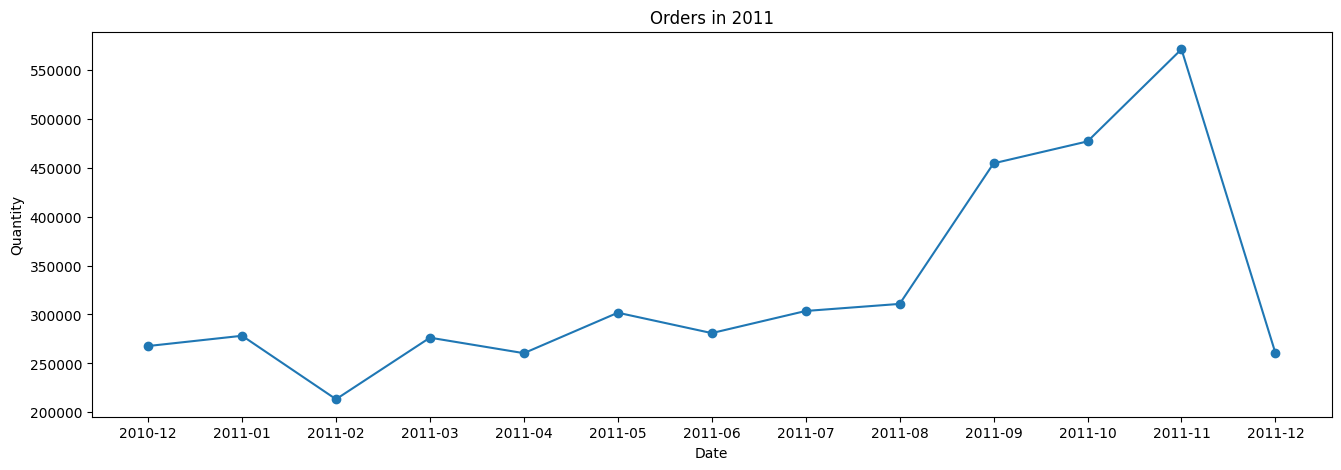

In [30]:
plot_df(df_agg, x=df_agg.Date, y=df_agg.Quantity,title='Orders in 2011')

* Produk yang terjual pada tiap bulannya menunjukkan trend naik dan mengalami penurunan yang signifikan pada tahun 2011 bulan November mengalami trend naik pada bulan November karena terdapat Black Friday pada tahun 2011 dimana disana terdapat hari belanja nasional sehingga penjualan produk mengalami peningkatan. Mengalami penurunan di bulan Februari

**How much customer spend their money every month?**

In [31]:
#Calculating Revenue
#Revenue = Order Count * Average Revenue per Order

df['Revenue'] = df['Quantity']*df['UnitPrice']

<Axes: ylabel='Revenue'>

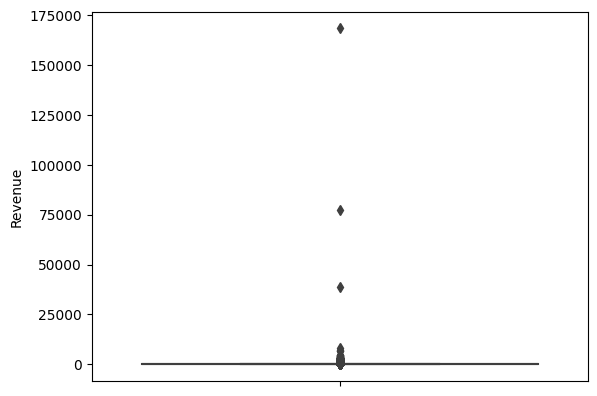

In [32]:
sns.boxplot(y=df['Revenue'])

* Revenue adalah pendapatan kotor yang dihasilkan oleh perusahaan dari kegiatan operasional, penjualan barang atau jasa, atau aktivitas bisnis utama

In [33]:
#Monthly Revenue

df_revenue = df.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()
df_revenue.head()

,InvoiceYearMonth,Revenue
0,201012,498661.850
1,201101,442190.060
2,201102,355655.630
3,201103,467198.590
4,201104,409559.141


In [34]:
plot_data = [
    go.Scatter(
        x=df_revenue['InvoiceYearMonth'],
        y=df_revenue['Revenue'],
        mode='lines+markers'
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Montly Revenue'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

# Modelling

## Analisis RFM

* Recency Frequency Monetary (RFM)

* Analisis RFM memungkinkan Anda mengelompokkan pelanggan berdasarkan frekuensi dan nilai pembelian serta mengidentifikasi pelanggan yang menghabiskan uang paling banyak.

Recency — sudah berapa lama sejak pelanggan membeli sesuatu dari kami.

Frequency — seberapa sering pelanggan membeli dari kami.

Monetary Value — nilai total pembelian yang dilakukan pelanggan.

* Tanggal faktur terakhir adalah 2011–12–09, kami akan menggunakan tanggal ini untuk menghitung Keterkinian.

In [35]:
NOW = dt.date(2011,12,9)
df['Date'] = pd.DatetimeIndex(df.InvoiceDate).date

In [36]:
#Recency (sudah berapa lama sejak pelanggan membeli sesuatu dari kami)

df_recency = df.groupby(['CustomerID'],as_index=False)['Date'].max()
df_recency.columns = ['CustomerID','Last_Purchase_Date']

df_recency['Recency'] = df_recency.Last_Purchase_Date.apply(lambda x:(NOW - x).days)
df_recency.drop(columns=['Last_Purchase_Date'],inplace=True)
df_recency.head()

,CustomerID,Recency
0,12346.0,325
1,12747.0,2
2,12748.0,0
3,12749.0,3
4,12820.0,3


In [37]:
#Frequency - Monetarty

FM_Table = df.groupby('CustomerID').agg({'InvoiceNo'   : lambda x:len(x),
                                         'Revenue'  : lambda x:x.sum()})
FM_Table.rename(columns = {'InvoiceNo' :'Frequency',
                           'Revenue':'Monetary'},inplace= True)
FM_Table.head()

,Frequency,Monetary
CustomerID,,
12346.0,1,77183.60
12747.0,103,4196.01
12748.0,4595,33719.73
12749.0,199,4090.88
12820.0,59,942.34


In [38]:
RFM_Table = df_recency.merge(FM_Table,left_on='CustomerID',right_on='CustomerID')
RFM_Table.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4595,33719.73
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


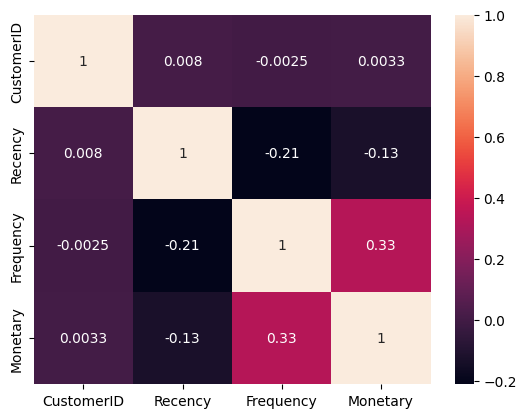

In [39]:
#Heatmap check
sns.heatmap(RFM_Table.corr(), annot=True);

## Modelling Data : RFM Quantiles

* Sekarang kami membagi metrik menjadi beberapa segmen menggunakan kuantil.
* ami akan memberikan skor dari 1 hingga 4 untuk masing-masing Keterkinian, Frekuensi, dan Moneter.
* 1 adalah nilai tertinggi, dan 4 adalah nilai terendah.
* Skor RFM akhir (Nilai Keseluruhan) dihitung hanya dengan menggabungkan angka skor RFM individual.

In [40]:
quantiles = RFM_Table.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()

In [41]:
segmented_rfm = RFM_Table.copy()

In [42]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [43]:
segmented_rfm['R_quartile'] = segmented_rfm['Recency'].apply(RScore, args=('Recency',quantiles))
segmented_rfm['F_quartile'] = segmented_rfm['Frequency'].apply(FMScore, args=('Frequency',quantiles))
segmented_rfm['M_quartile'] = segmented_rfm['Monetary'].apply(FMScore, args=('Monetary',quantiles))
segmented_rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile
0,12346.0,325,1,77183.60,4,4,1
1,12747.0,2,103,4196.01,1,1,1
2,12748.0,0,4595,33719.73,1,1,1
3,12749.0,3,199,4090.88,1,1,1
4,12820.0,3,59,942.34,1,2,2


Calculating the total RFM score combined.

RFM_Score = R_quartile + F_quartile + M_quartile

In [44]:
segmented_rfm['RFM_Segment'] = segmented_rfm.R_quartile.map(str)+segmented_rfm.F_quartile.map(str)+segmented_rfm.M_quartile.map(str)

In [45]:
segmented_rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment
0,12346.0,325,1,77183.60,4,4,1,441
1,12747.0,2,103,4196.01,1,1,1,111
2,12748.0,0,4595,33719.73,1,1,1,111
3,12749.0,3,199,4090.88,1,1,1,111
4,12820.0,3,59,942.34,1,2,2,122


In [46]:
segmented_rfm['RFM_Score'] = segmented_rfm[['R_quartile','F_quartile','M_quartile']].sum(axis=1)

In [47]:
segmented_rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score
0,12346.0,325,1,77183.60,4,4,1,441,9
1,12747.0,2,103,4196.01,1,1,1,111,3
2,12748.0,0,4595,33719.73,1,1,1,111,3
3,12749.0,3,199,4090.88,1,1,1,111,3
4,12820.0,3,59,942.34,1,2,2,122,5


In [48]:
print("Best Customers: ",len(segmented_rfm[segmented_rfm['RFM_Segment']=='111']))
print('Loyal Customers: ',len(segmented_rfm[segmented_rfm['F_quartile']==1]))
print("Big Spenders: ",len(segmented_rfm[segmented_rfm['M_quartile']==1]))
print('Almost Lost: ', len(segmented_rfm[segmented_rfm['RFM_Segment']=='134']))
print('Lost Customers: ',len(segmented_rfm[segmented_rfm['RFM_Segment']=='344']))
print('Lost Cheap Customers: ',len(segmented_rfm[segmented_rfm['RFM_Segment']=='444']))

Best Customers:  409
Loyal Customers:  980
Big Spenders:  980
Almost Lost:  21
Lost Customers:  168
Lost Cheap Customers:  343


In [49]:
# Setting up the label for each client and adding the column "Label" to the dataframe

label = [0] * len(segmented_rfm)

for i in range(0,len(segmented_rfm)):

    if segmented_rfm['RFM_Segment'][i] == '111':
        label[i] = "Best Customers"

    elif segmented_rfm['RFM_Segment'][i] == '134' :
        label[i] = "Almost Lost"

    elif segmented_rfm['RFM_Segment'][i] == '344':
        label[i] = "Lost Customers"

    elif segmented_rfm['RFM_Segment'][i] == '444':
        label[i] = "Lost Cheap Customers"

    elif segmented_rfm['F_quartile'][i] == 1:
        label[i] = "Loyal Customers"

    elif segmented_rfm['M_quartile'][i] == 1:
        label[i] = "Big Spenders"

    else:
        label[i] = "Others"

In [50]:
# menambahkan  'Label' kolom ke dalam dataframe

segmented_rfm['Label'] = label

In [51]:
# Hitung frekuensi munculnya nilai di kolom kerangka data untuk label.

segmented_rfm['Label'].value_counts()

Others                  2135
Loyal Customers          571
Best Customers           409
Lost Cheap Customers     343
Big Spenders             273
Lost Customers           168
Almost Lost               21
Name: Label, dtype: int64

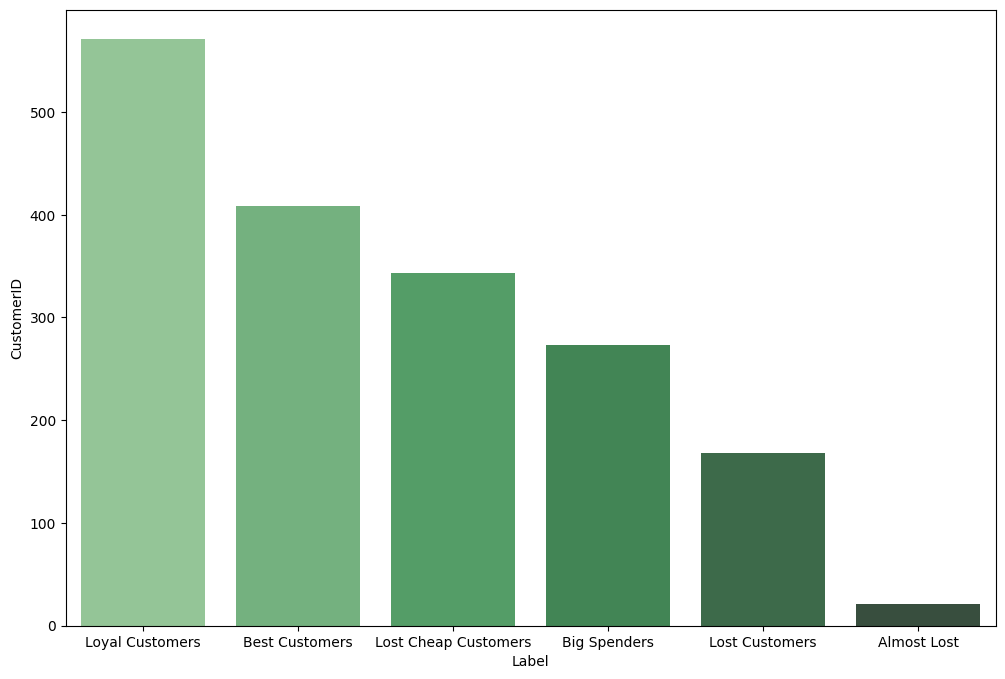

In [52]:
import seaborn as sns
sq1=segmented_rfm.groupby('Label')['CustomerID'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12,8))
sq1.drop([0],inplace=True)
sns.barplot(data=sq1, x="Label", y="CustomerID", palette = "Greens_d");

## Modelling Data : K-Means Clustering

Algoritme pengelompokan K-Means adalah algoritme pembelajaran mesin tanpa pengawasan yang menggunakan beberapa iterasi untuk mengelompokkan titik data yang tidak berlabel menjadi K cluster berbeda sedemikian rupa sehingga setiap titik data hanya dimiliki oleh satu grup yang memiliki properti serupa.

In [53]:
RFM_Table_New = RFM_Table.drop('CustomerID', axis=1)

In [54]:
RFM_Table_New.head()

,Recency,Frequency,Monetary
0,325,1,77183.60
1,2,103,4196.01
2,0,4595,33719.73
3,3,199,4090.88
4,3,59,942.34


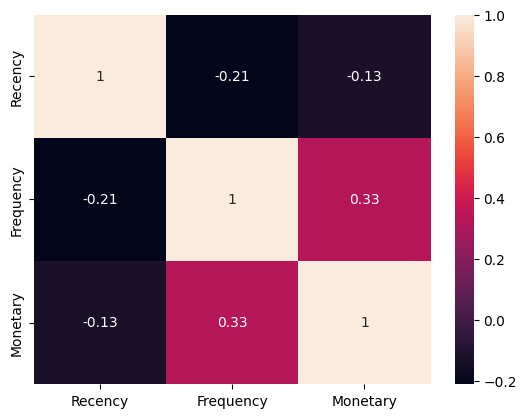

In [55]:
#Heatmap check
sns.heatmap(RFM_Table_New.corr(), annot=True);

<Axes: xlabel='Recency', ylabel='Density'>

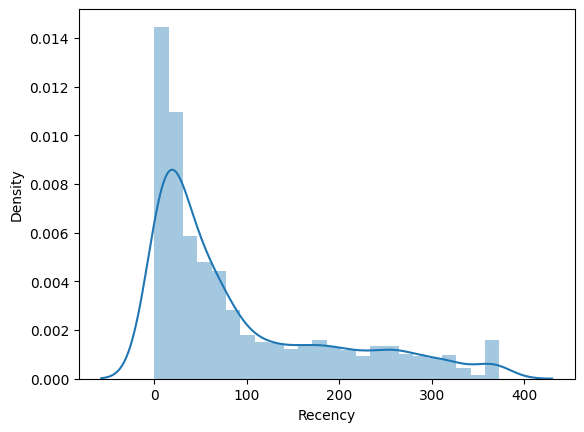

In [56]:
#Analyze distribution

sns.distplot(RFM_Table_New['Recency'])

<Axes: xlabel='Frequency', ylabel='Density'>

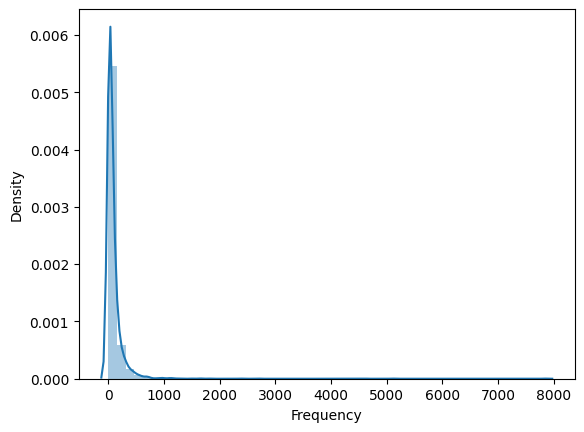

In [57]:
sns.distplot(RFM_Table_New['Frequency'])

<Axes: xlabel='Monetary', ylabel='Density'>

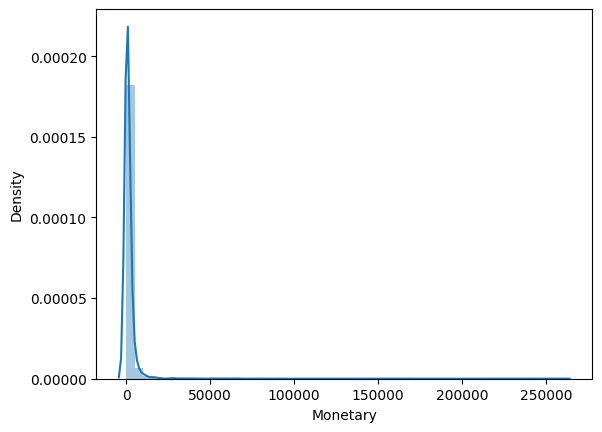

In [58]:
sns.distplot(RFM_Table_New['Monetary'])

* K-means memberikan hasil terbaik dengan ketentuan sebagai berikut:
1. Distribusi data tidak menyimpang (berbentuk lonceng)
2. Data distandarisasi.

Datanya sangat skew, oleh karena itu kami akan melakukan transformasi log untuk mengurangi skewness setiap variabel. Saya menambahkan sebuah konstanta kecil karena transformasi log menuntut semua nilai menjadi positif

In [59]:
df_rfm_log = RFM_Table_New.copy()
df_rfm_log.head()

,Recency,Frequency,Monetary
0,325,1,77183.60
1,2,103,4196.01
2,0,4595,33719.73
3,3,199,4090.88
4,3,59,942.34


In [60]:
df_rfm_log = np.log(df_rfm_log+1)

In [61]:
windsoriser = Winsorizer(tail='both', # cap left, right or both tails
                          fold=2,
                           variables=[ 'Recency', 'Frequency', 'Monetary']
                        )
windsoriser.fit(df_rfm_log)

Winsorizer(fold=2, tail='both', variables=['Recency', 'Frequency', 'Monetary'])

In [62]:
df_rfm_log = windsoriser.transform(df_rfm_log)

Setelah kemiringannya berkurang, saya membakukan data dengan memusatkan dan menskalakan. Perhatikan bahwa semua variabel sekarang memiliki rata-rata 0 dan deviasi standar 1.

In [63]:
#Dilakukan tranfsormasi logaritma agar data terstandarisasi

scaler = StandardScaler()

scaler.fit(df_rfm_log)

RFM_Table_New_scaled = scaler.transform(df_rfm_log)

In [64]:
RFM_Table_New_scaled = pd.DataFrame(RFM_Table_New_scaled, columns=RFM_Table_New.columns)
RFM_Table_New_scaled.head()

,Recency,Frequency,Monetary
0,1.465314,-2.075553,2.144184
1,-2.017962,0.758501,1.551863
2,-2.065658,2.072989,2.144184
3,-1.804222,1.296773,1.530119
4,-1.804222,0.305737,0.272403


<Axes: xlabel='Recency', ylabel='Density'>

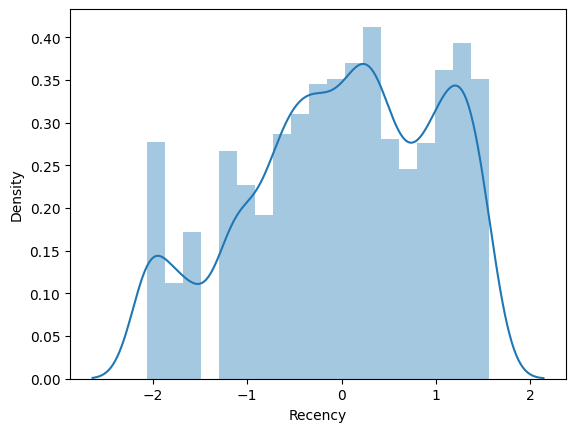

In [65]:
#Analyze distribution

sns.distplot(RFM_Table_New_scaled['Recency'])

<Axes: xlabel='Frequency', ylabel='Density'>

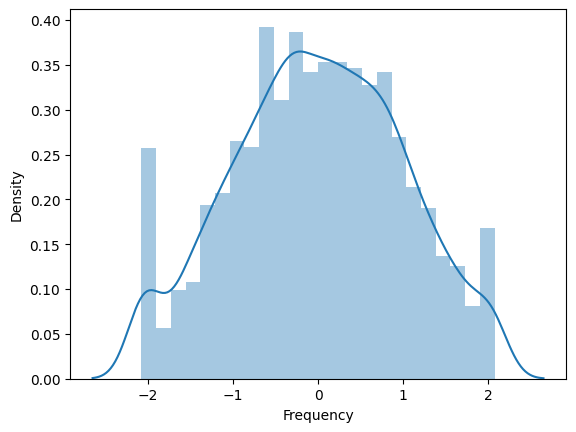

In [66]:
sns.distplot(RFM_Table_New_scaled['Frequency'])

<Axes: xlabel='Monetary', ylabel='Density'>

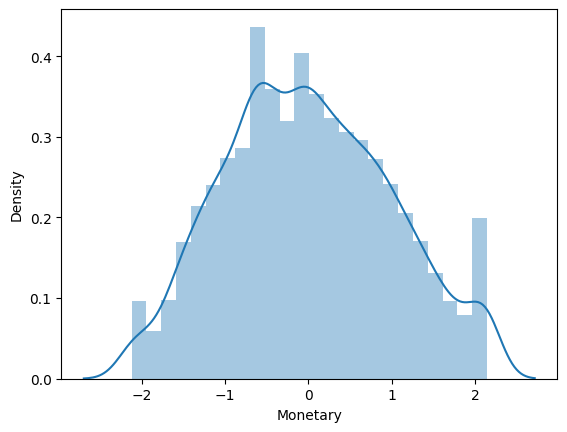

In [67]:
sns.distplot(RFM_Table_New_scaled['Monetary'])

**Finding the optimal number of clusters**

In [68]:
X = np.asarray(RFM_Table_New_scaled)

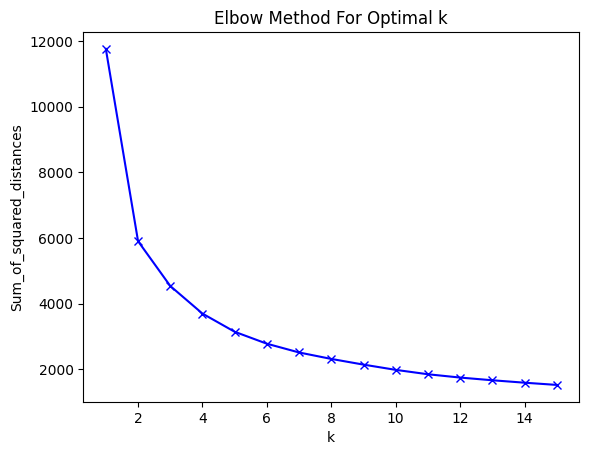

In [69]:
Sum_of_squared_distances = []
K = range(1,16)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [70]:
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):

    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_rfm)

    # Extract cluster labels
    cluster_labels = kmeans.labels_

    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)

    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)

    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")

    return df_new

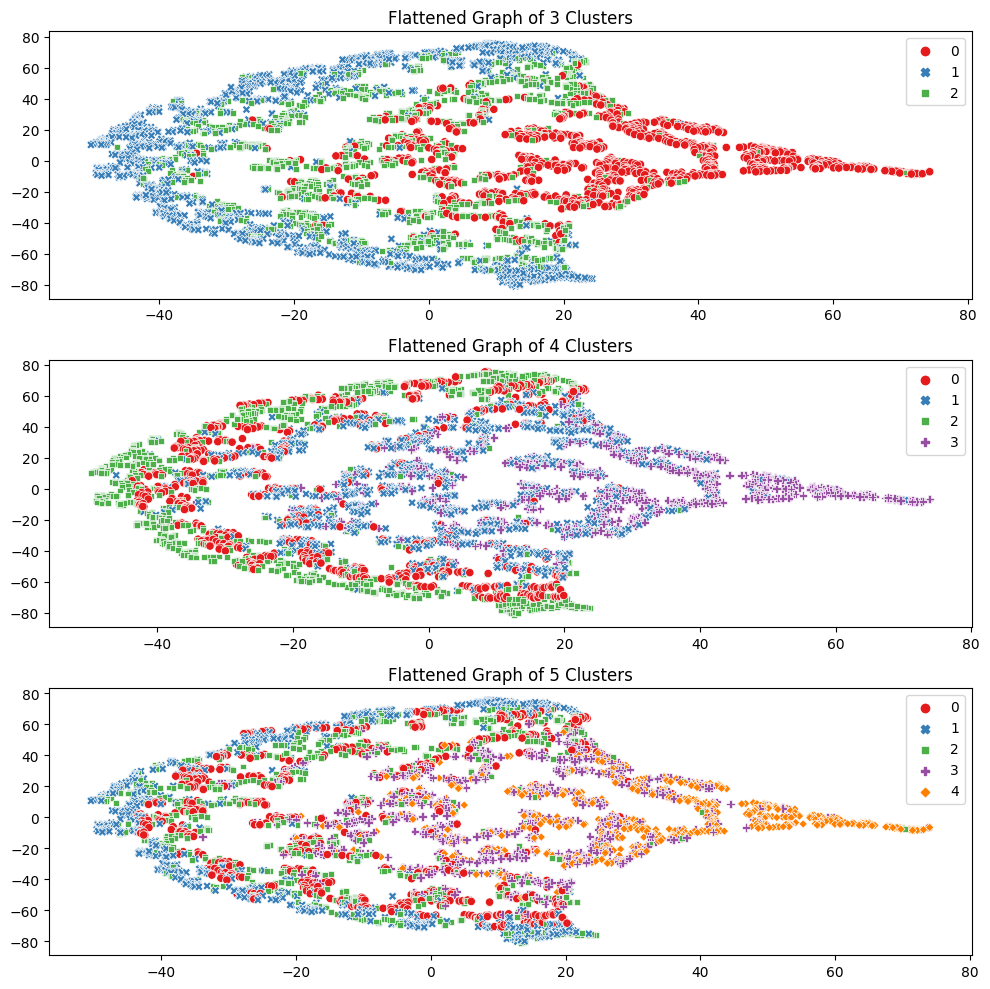

In [71]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
df_rfm_k3 = kmeans(RFM_Table_New_scaled, 3, RFM_Table)

plt.subplot(3, 1, 2)
df_rfm_k4 = kmeans(RFM_Table_New_scaled, 4, RFM_Table)

plt.subplot(3, 1, 3)
df_rfm_k5 = kmeans(RFM_Table_New_scaled, 5, RFM_Table)

plt.tight_layout()

In [72]:
def snake_plot(normalised_df_rfm, df_rfm_kmeans, df_rfm_original):

    normalised_df_rfm = pd.DataFrame(normalised_df_rfm,
                                       index=RFM_Table.index,
                                       columns=RFM_Table.columns)
    normalised_df_rfm['Cluster'] = df_rfm_kmeans['Cluster']

    # Melt data into long format
    df_melt = pd.melt(normalised_df_rfm.reset_index(),
                        id_vars=['CustomerID', 'Cluster'],
                        value_vars=['Recency', 'Frequency', 'Monetary'],
                        var_name='Metric',
                        value_name='Value')

    plt.xlabel('Metric')
    plt.ylabel('Value')
    sns.pointplot(data=df_melt, x='Metric', y='Value', hue='Cluster')

    return

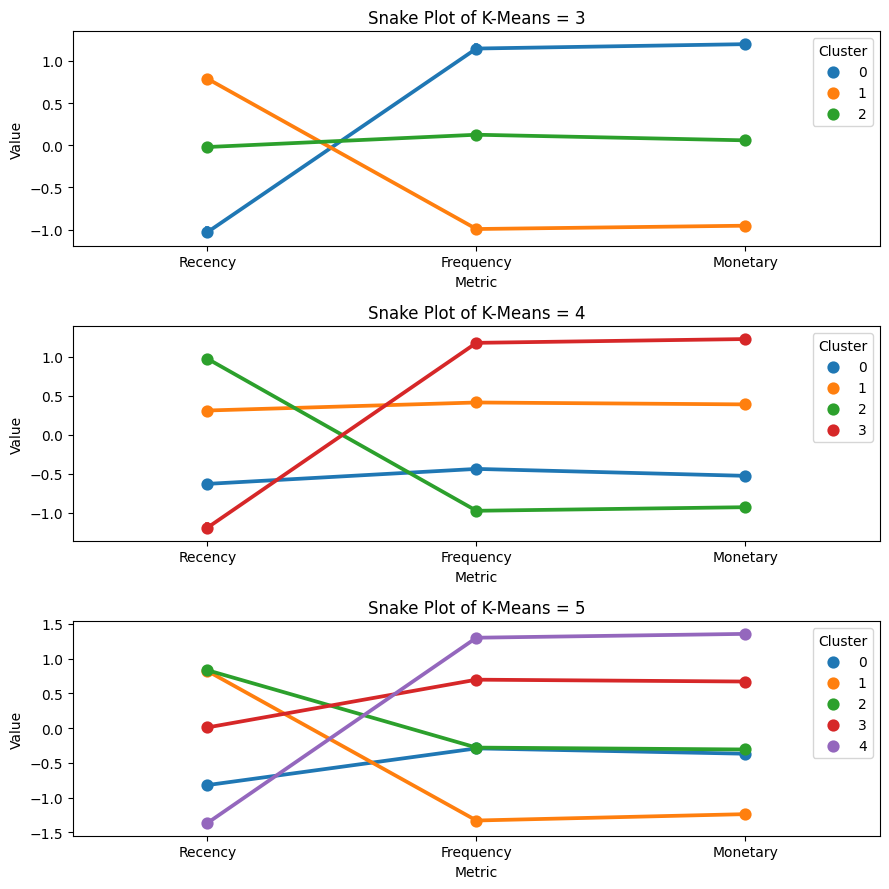

In [73]:
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
plt.title('Snake Plot of K-Means = 3')
snake_plot(RFM_Table_New_scaled, df_rfm_k3, RFM_Table)

plt.subplot(3, 1, 2)
plt.title('Snake Plot of K-Means = 4')
snake_plot(RFM_Table_New_scaled, df_rfm_k4, RFM_Table)

plt.subplot(3, 1, 3)
plt.title('Snake Plot of K-Means = 5')
snake_plot(RFM_Table_New_scaled, df_rfm_k5, RFM_Table)

plt.tight_layout()

# Evaluating Model : K-Means Clustering

Davies Bouldin Score is a metric for evaluating clustering algorithms. The smaller Davies Bouldin Score is The more optimal the cluster

In [74]:
# Kmeans = 3
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [75]:
print(davies_bouldin_score(X, kmeans.labels_))

1.1226015814785137


In [76]:
# Kmeans = 4
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(n_clusters=4)

In [77]:
print(davies_bouldin_score(X, kmeans.labels_))

1.065617503228658


In [78]:
# Kmeans = 5
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [79]:
print(davies_bouldin_score(X, kmeans.labels_))

1.0702068878582707


K-Means 4 clusters has lowest davies bouldin score than other cluster. Therefore the optimum cluster is 4.

In [80]:
df_rfm_k4.head()

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346.0,325,1,77183.60,1
1,12747.0,2,103,4196.01,3
2,12748.0,0,4595,33719.73,3
3,12749.0,3,199,4090.88,3
4,12820.0,3,59,942.34,3


In [81]:
df_rfm_k4.Cluster.value_counts()

2    1173
1    1130
3     854
0     763
Name: Cluster, dtype: int64

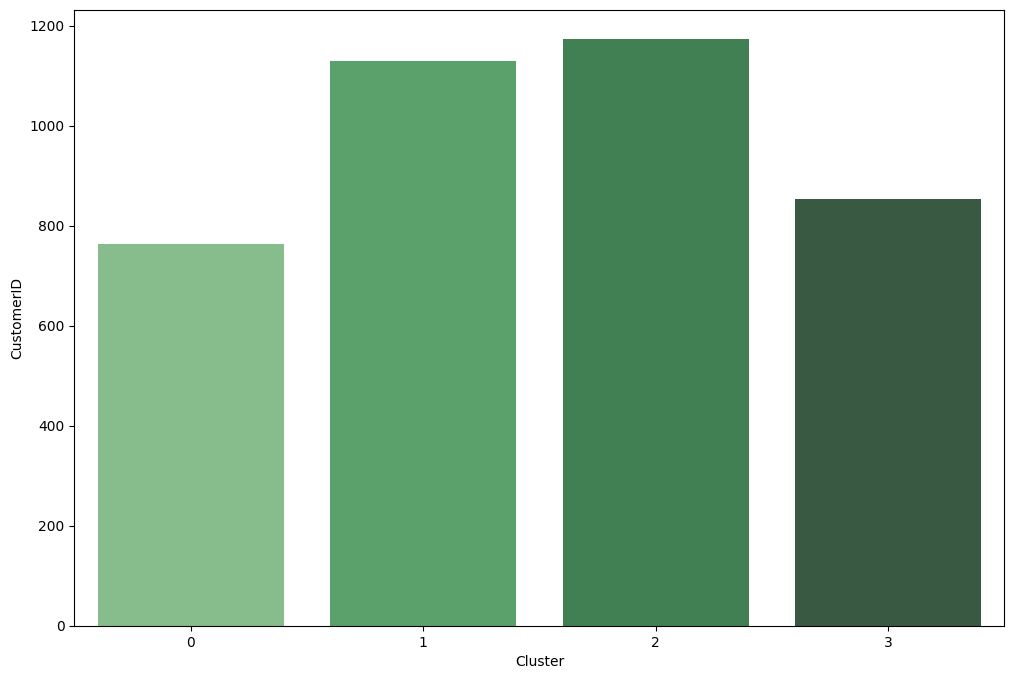

In [82]:
import seaborn as sns
sq1=df_rfm_k4.groupby('Cluster')['CustomerID'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12,8))
sns.barplot(data=sq1, x="Cluster", y="CustomerID", palette = "Greens_d");

Interpretasi cluster yang dibentuk menggunakan k-means.

In [83]:
def rfm_values(df):

    df_new = df.groupby(['Cluster']).agg({
        'Recency': 'mean',
        'Frequency': 'mean',
        'Monetary': ['mean', 'count']
    }).round(0)

    return df_new

In [84]:
rfm_values(df_rfm_k4)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          24.0      30.0    463.0   763
1          89.0      81.0   1448.0  1130
2         197.0      15.0    293.0  1173
3          12.0     260.0   5825.0   854

* "Cluster 0" memiliki 29% pelanggan. Ini termasuk dalam segmen "Pelanggan Setia" karena mereka sudah lama tidak membeli, tetapi sering membeli (F=2) dan menghabiskan banyak uang. (R=3, F=2, M=2)

* "Cluster 1" memiliki 20% pelanggan. Dapat diartikan sebagai "Hampir Hilang". Mereka membeli baru-baru ini (R=2). Namun mereka tidak sering membeli dan tidak menghabiskan banyak uang. (R=2, F=3, M=3)

* "Cluster 2" memiliki 30% pelanggan. Dapat diartikan sebagai “Pelanggan Murah yang Hilang”. Pembelian terakhir mereka sudah lama sekali (R=4), dibeli sangat sedikit (F=4) dan menghabiskan sedikit uang (M=4). (R=4, F=4, M=4)

* "Cluster 3" memiliki 21% pelanggan. Ini termasuk dalam segmen "Pelanggan Terbaik" yang kita lihat sebelumnya karena mereka membeli baru-baru ini (R=1), pembeli sering (F=1), dan paling banyak menghabiskan uang (M=1). (R=1, F=1, M=1)

# Rekomendasi
1. Rekomendasi untuk segmen “Pelanggan Terbaik” : Fokus pada peningkatan pembelian pelanggan sehingga perlu dibentuk Strategi cross/Up Selling.
2. Rekomendasi untuk segmen “Pelanggan Setia”: Tim bisnis harus mengoptimalkan kampanye anggaran dan kampanye waktu untuk segmen pelanggan ini guna mempertahankan loyalitas dan meningkatkan nilai mereka.
3. Rekomendasi untuk segmen “Hampir Hilang”: Segmen pelanggan ini sangat berisiko untuk churn, jadi fokuslah untuk mengaktifkan pelanggan dan melakukan pembelian kembali dengan membentuk Strategi Reaktivasi, Strategi Retensi.
4. Rekomendasi untuk segmen “Pelanggan Murah yang Hilang”: Segmen pelanggan ini sudah churn, sehingga fokus kampanyenya adalah mengaktifkan kembali pelanggan tersebut dengan membentuk strategi Reaktivasi.